Part A

In [32]:
import numpy as np
from skimage import morphology
import matplotlib.pyplot as plt

In [33]:
with open ("input11.txt","r") as f:
    lines=f.readlines()

In [34]:
for idx,line in enumerate(lines):
    line=line.strip("\n")
    line=[int(char) for char in line]
    lines[idx]=line

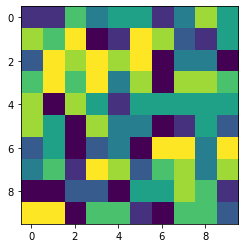

In [35]:
orig_img=np.array(lines)
plt.imshow(orig_img)


In [36]:
# orig_img=np.array([
#     [5,4,8,3,1,4,3,2,2,3],
# [2,7,4,5,8,5,4,7,1,1],
# [5,2,6,4,5,5,6,1,7,3],
# [6,1,4,1,3,3,6,1,4,6],
# [6,3,5,7,3,8,5,4,7,8],
# [4,1,6,7,5,2,4,6,4,5],
# [2,1,7,6,8,4,1,7,2,1],
# [6,8,8,2,8,8,1,1,3,4],
# [4,8,4,6,8,4,8,5,5,4],
# [5,2,8,3,7,5,1,5,2,6]
#     ])

In [40]:
def one_round(img):
    # update energylevel
    img=(img+1)%10
    
    is_flashable=np.ones_like(img)

    done=False
    
    nflashes=0
    
    while not done:
        # find flashing octopuses
        rows,cols=np.where(np.logical_and(img==0,is_flashable==1))
        
        if len(rows)==0:
            done=True
            
        else:
            nflashes+=len(rows)

            # they can't flash again this round
            is_flashable[rows,cols]=0

            # update the neighbor octopuses
            for r,c in zip(rows,cols):
                rmin,rmax=max(0,r-1), min(r+1,9)
                cmin,cmax=max(0,c-1), min(c+1,9)
                
                img_crop=img[rmin:rmax+1,cmin:cmax+1]
                is_flashable_crop=is_flashable[rmin:rmax+1,cmin:cmax+1]
                
                is_zero_crop=(img_crop==0)
                
                # increase flashable neighbors by 1
                updated_crop=is_flashable_crop*((img_crop+1)%10)
                
                # if squid turned 0 in this for loop (but is still flashable), keep it at 0
                updated_crop[is_zero_crop]=0
                
                img[rmin:rmax+1,cmin:cmax+1]=updated_crop
            
    return img, nflashes


In [41]:
img=orig_img.copy()
#print(img,"\n")
total_nflashes=0

for idx in range(100):
    img, nflashes=one_round(img)
    total_nflashes+=nflashes
    #print(img,nflashes,"\n")

In [42]:
total_nflashes

1632

Part B

In [52]:
img=orig_img.copy()

nflashes=0
idx=0

while nflashes!=100: # 100 octopuses
    img, nflashes=one_round(img)
    idx+=1

In [53]:
idx

303